In [24]:
# Importing the libraries:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [25]:
# Importing the dataset: 
data = pd.read_csv("SPAM text message 20170820 - Data.csv")
print(data.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [27]:
texts = []  # stores emails as list of strings.
labels = [] # stores ham/spam where, 'Ham' == 0 and 'Spam' == 1 corresponding to that email.

# enumerate attaches a stream of data with integers starting from 0. 
for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

# Converting list to python numpy array:
texts = np.asarray(texts)
labels = np.asarray(labels)


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [28]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

# Setting features and maxlen:
#########################################
# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500

# Segregating training and testing data:
#########################################
# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))
#########################################

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts) 
sequences = tokenizer.texts_to_sequences(texts) # Transforms each text in texts to a sequence of integers based on word-index

word_index = tokenizer.word_index  # 'word_index' is a dictionary of tokenizer-assigned word-index mapping.
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen) # Pads sequences to the same length(either maxlen or max size of a sequence).
print("data shape: ", data.shape)


np.random.seed(42) # Setting it generates the same random numbers multiple times. Used for getting the same numbers in case
# shuffle data
indices = np.arange(data.shape[0]) # Represents total no of data points.
np.random.shuffle(indices) #  shuffles the array along the first axis of a multi-dimensional array.
data = data[indices]
labels = labels[indices]
# By now the data has been shuffled.

# Now we break data into train and test samples:
texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

True
The number of training 4457, validation 1115 
Found 9004 unique words: 
data shape:  (5572, 500)


In [29]:
model = Sequential()
model.add(Embedding(max_features, 32)) # output size = 32.
model.add(SimpleRNN(32)) # 32 is the no of units.
model.add(Dense(1, activation='sigmoid')) # 1 dense unit to follow simple RNN layer.

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# Root Mean Squared Propagation, or RMSProp, is an extension of gradient descent and the AdaGrad version of gradient descent 
# that uses a decaying average of partial gradients in the adaptation of the step size for each parameter.

# 'binary_crossentropy': Used as a loss function for binary classification model. For multiclass classification, use 'categorical_crossentropy'


history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2) # The validation set is a set
# of data, separate from the training set, that is used to validate our model performance during training.

# 'history_rnn' is History callback object. This object keeps track of the accuracy, loss and other training metrics, for each epoch, in the memory.

Epoch 1/10
60/60 [==============================] - 14s 99ms/step - loss: 0.4528 - acc: 0.8426 - val_loss: 0.2596 - val_acc: 0.9327
Epoch 2/10
60/60 [==============================] - 6s 102ms/step - loss: 0.1583 - acc: 0.9604 - val_loss: 0.1430 - val_acc: 0.9608
Epoch 3/10
60/60 [==============================] - 6s 103ms/step - loss: 0.0740 - acc: 0.9806 - val_loss: 0.0891 - val_acc: 0.9742
Epoch 4/10
60/60 [==============================] - 6s 105ms/step - loss: 0.0439 - acc: 0.9874 - val_loss: 0.6857 - val_acc: 0.6581
Epoch 5/10
60/60 [==============================] - 7s 114ms/step - loss: 0.1169 - acc: 0.9554 - val_loss: 0.1852 - val_acc: 0.9316
Epoch 6/10
60/60 [==============================] - 7s 111ms/step - loss: 0.0404 - acc: 0.9882 - val_loss: 0.0699 - val_acc: 0.9765
Epoch 7/10
60/60 [==============================] - 6s 104ms/step - loss: 0.0240 - acc: 0.9933 - val_loss: 0.0529 - val_acc: 0.9877
Epoch 8/10
60/60 [==============================] - 7s 111ms/step - loss: 0.

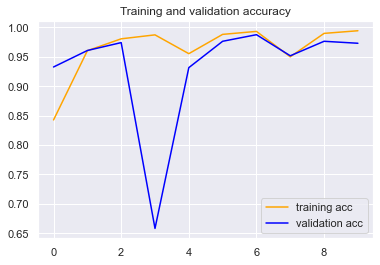

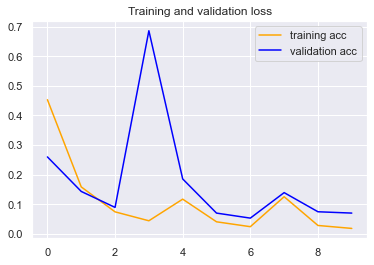

In [30]:
acc = history_rnn.history['acc'] # 'Accuracy' metric of model after each epoch.
val_acc = history_rnn.history['val_acc'] # 'Val_Accuracy' metric of model after each epoch.
loss = history_rnn.history['loss'] # 'Loss metric' of model after each epoch.
val_loss = history_rnn.history['val_loss'] # 'Val_Loss' metric of model after each epoch.
# The size of each list above will be equal to the no of epochs.
epochs = range(len(acc))

# Plotting (Accuracy Vs Epoch in Orange) and (Val_Accuracy vs epoch in blue):
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Plotting (Loss Vs Epoch in Orange) and (Val_Loss vs epoch in blue):
plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix
predict_x = model.predict(texts_test) 
pred = np.argmax(predict_x,axis=1) # Returns the indices of the maximum values along an axis in a matrix, as an array.
acc = model.evaluate(texts_test, y_test)
# evaluate() is for evaluating the already trained model using the validation (or test) data and the corresponding labels. 
# It returns the loss value and metrics values for the model. predict() is for the actual prediction.
proba_rnn = np.argmax(model.predict(texts_test), axis=-1)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

35/35 [==============================] - 1s 22ms/step
Test loss is 0.07 accuracy is 0.98  
[[961 154]
 [  0   0]]


In [32]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 15s 204ms/step - loss: 0.3277 - acc: 0.8746 - val_loss: 0.1649 - val_acc: 0.9596
Epoch 2/10
60/60 [==============================] - 14s 233ms/step - loss: 0.1154 - acc: 0.9778 - val_loss: 0.0814 - val_acc: 0.9832
Epoch 3/10
60/60 [==============================] - 13s 218ms/step - loss: 0.0606 - acc: 0.9882 - val_loss: 0.0592 - val_acc: 0.9854
Epoch 4/10
60/60 [==============================] - 12s 197ms/step - loss: 0.0374 - acc: 0.9930 - val_loss: 0.0486 - val_acc: 0.9854
Epoch 5/10
60/60 [==============================] - 12s 198ms/step - loss: 0.0250 - acc: 0.9955 - val_loss: 0.0561 - val_acc: 0.9798
Epoch 6/10
60/60 [==============================] - 12s 206ms/step - loss: 0.0185 - acc: 0.9958 - val_loss: 0.0476 - val_acc: 0.9843
Epoch 7/10
60/60 [==============================] - 12s 202ms/step - loss: 0.0127 - acc: 0.9969 - val_loss: 0.0508 - val_acc: 0.9809
Epoch 8/10
60/60 [==============================] - 12s 203ms/step - 

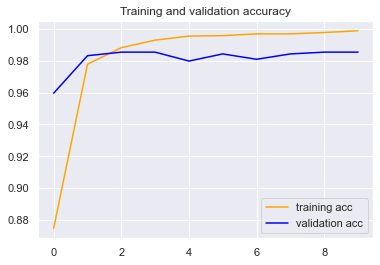

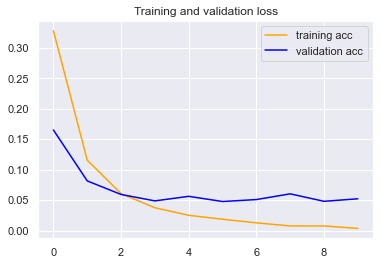

In [33]:
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
pred = np.argmax(model.predict(texts_test), axis=-1)
acc = model.evaluate(texts_test, y_test)
proba_ltsm = np.argmax(model.predict(texts_test), axis=-1)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

35/35 [==============================] - 2s 56ms/step
Test loss is 0.08 accuracy is 0.98  
[[961 154]
 [  0   0]]


In [35]:
pwd

'C:\\Users\\Ashutosh\\Desktop\\mltrainingtechcovery-master\\tensorflow\\deep-neural\\rnn\\ham_spam'